In [36]:
# Importing Libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Loading the dataset
california_housing = fetch_california_housing()

In [37]:
# Coverting to pandas dataframe
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(california_housing.target, columns=['Target'])

# Combining into single dataframe
df = pd.concat([data, target], axis=1)

# Displaying first 5 rows
print(df.head(), '\n')

# Checking for missing values
print(df.isna().sum(), '\n')

# Describing data
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422   

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64 

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std    

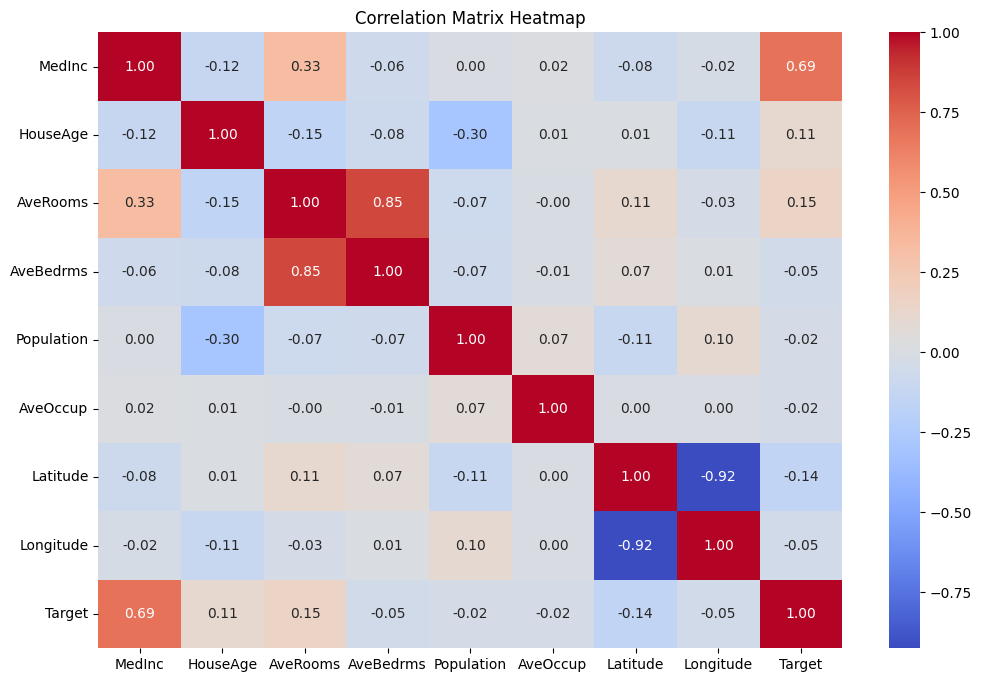

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [39]:
# Preprocessing steps
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [40]:
# Baseline Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"Linear Regression R^2 Score: {r2_score(y_test, y_pred_lr)}")

# Random Forest Regressor Model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Random Forest R^2 Score: {r2_score(y_test, y_pred_rf)}")

Linear Regression MSE: 0.5558915986952444
Linear Regression R^2 Score: 0.5757877060324508
Random Forest MSE: 0.25549776668540763
Random Forest R^2 Score: 0.805024407701793


In [41]:
# Building the model
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Input

model = Sequential([
    Input(shape=(X_train.shape[1],), name='InputLayer'),
    Dense(64, activation='relu', name='Layer1'),
    BatchNormalization(name='Layer2'),
    Dropout(0.1, name='Layer3'),
    Dense(32, activation='relu', name='Layer4'),
    BatchNormalization(name='Layer5'),
    Dropout(0.1, name='Layer6'),
    Dense(1, name='Layer7')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                       │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer2 (BatchNormalization)          │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer3 (Dropout)                     │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer4 (Dense)                       │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer5 (BatchNormalization)          │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer6 (Dropout)                     │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer7 (Dense)                       │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 192 (768.00 B)

None


In [42]:
# Callbacks
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Training the model
model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1, callbacks=[callback], validation_data=[X_test, y_test])

Epoch 1/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - loss: 3.1701 - mean_absolute_error: 1.4088 - val_loss: 0.5213 - val_mean_absolute_error: 0.4885
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.6797 - mean_absolute_error: 0.6231 - val_loss: 0.4150 - val_mean_absolute_error: 0.4472
Epoch 3/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.5343 - mean_absolute_error: 0.5439 - val_loss: 0.4192 - val_mean_absolute_error: 0.4697
Epoch 4/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.4894 - mean_absolute_error: 0.5222 - val_loss: 0.4037 - val_mean_absolute_error: 0.4556
Epoch 5/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.4618 - mean_absolute_error: 0.5009 - val_loss: 0.3788 - val_mean_absolute_error: 0.4407
Epoch 6/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.4486 - mean_absolute_error: 0.4915 - val_loss: 0.3804 - val_mean_absolute_error: 0.4387
Epoch 7/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.4174 - mean_absolute_err

In [43]:
# Evaluating the model
loss, mae = model.evaluate(X_test, y_test, callbacks=[callback])
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.3674 - mean_absolute_error: 0.4313
Test Loss: 0.372326523065567
Test MAE: 0.43101391196250916


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


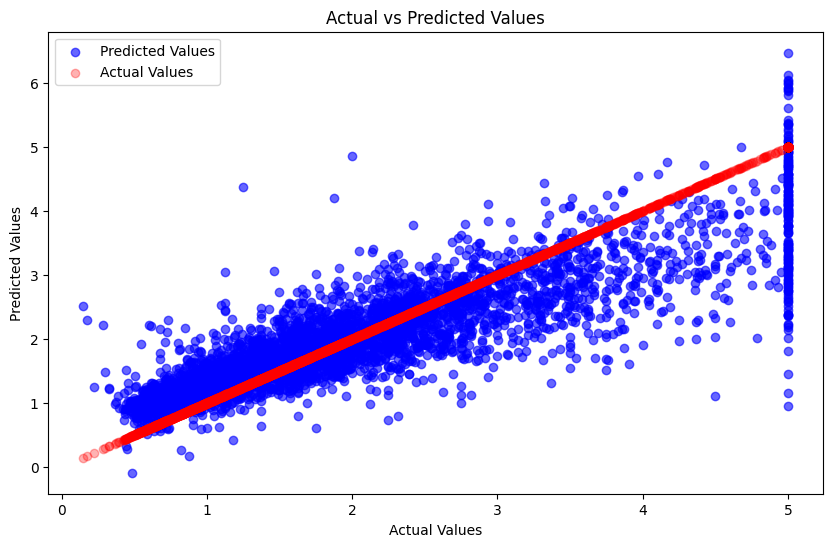

In [44]:
# Making predictions on the test set
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted Values')
plt.scatter(y_test, y_test, color='red', alpha=0.3, label='Actual Values')  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()